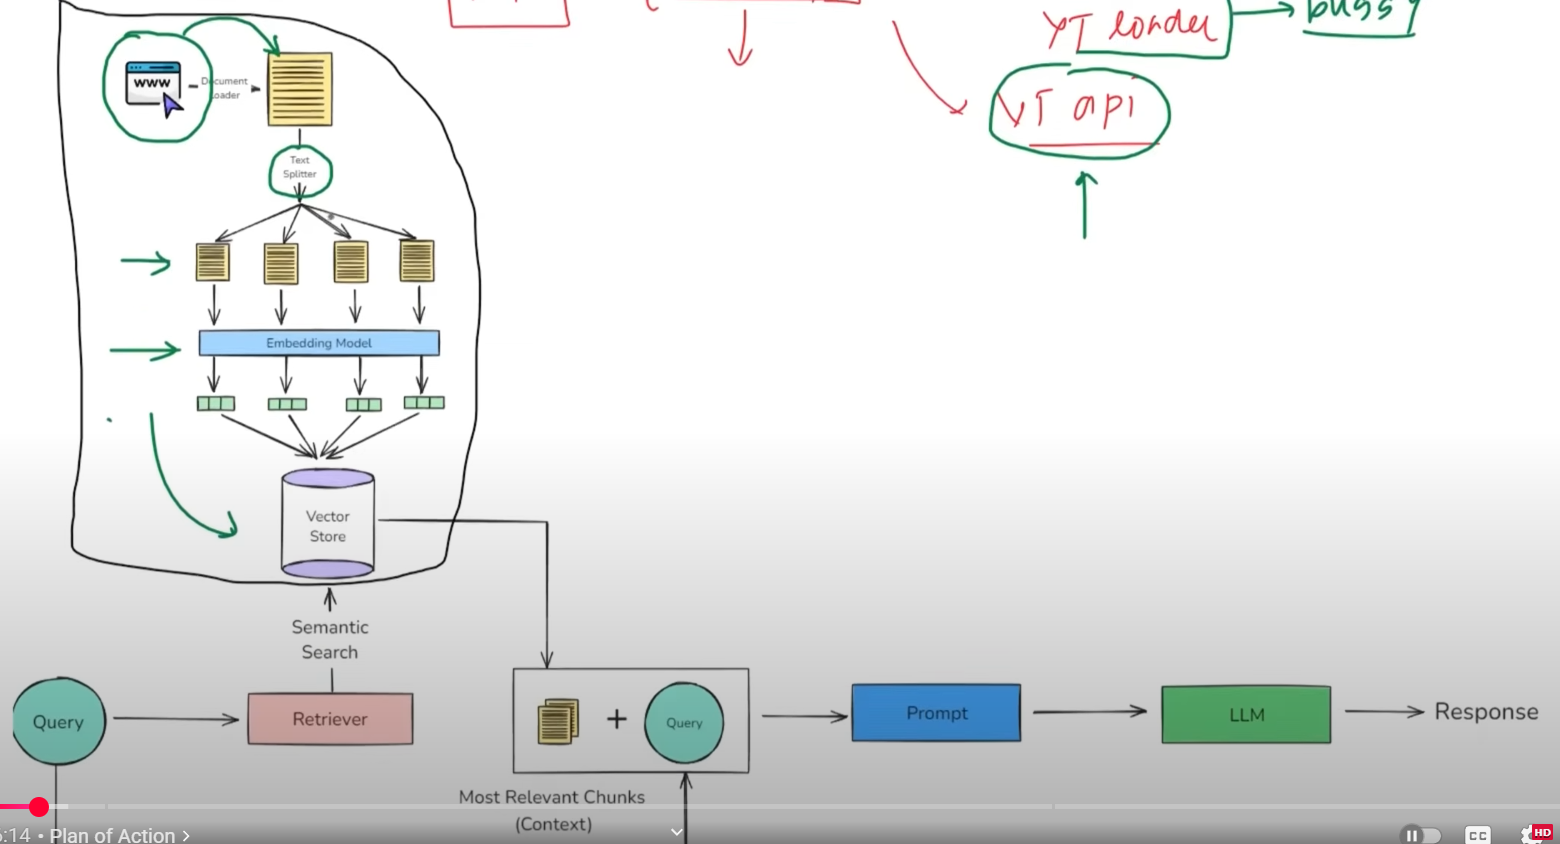

In [ ]:
import os
os.environ["OPENAI_API_KEY"]= "sk-proj"

### Install Libraries

In [1]:
!pip install -q youtube-transcript-api langchain-community langchain-openai \
               faiss-cpu tiktoken python-dotenv

### Import


In [4]:
from youtube_transcript_api import YouTubeTranscriptApi, TranscriptsDisabled
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings, ChatOpenAI
from langchain_community.vectorstores import FAISS
from langchain_core.prompts import PromptTemplate

### Indexing (Document Ingestion)

In [5]:
video_id = "Gfr50f6ZBvo" # only the ID, not full URL
try:
    # If you don’t care which language, this returns the “best” one
    transcript_list = YouTubeTranscriptApi.get_transcript(video_id, languages=["en"])

    # Flatten it to plain text
    transcript = " ".join(chunk["text"] for chunk in transcript_list)
    print(transcript)

except TranscriptsDisabled:
    print("No captions available for this video.")

the following is a conversation with demus hasabis ceo and co-founder of deepmind a company that has published and builds some of the most incredible artificial intelligence systems in the history of computing including alfred zero that learned all by itself to play the game of gold better than any human in the world and alpha fold two that solved protein folding both tasks considered nearly impossible for a very long time demus is widely considered to be one of the most brilliant and impactful humans in the history of artificial intelligence and science and engineering in general this was truly an honor and a pleasure for me to finally sit down with him for this conversation and i'm sure we will talk many times again in the future this is the lex friedman podcast to support it please check out our sponsors in the description and now dear friends here's demis hassabis let's start with a bit of a personal question am i an ai program you wrote to interview people until i get good enough 

In [6]:
transcript_list

[{'text': 'the following is a conversation with',
  'start': 0.08,
  'duration': 3.44},
 {'text': 'demus hasabis', 'start': 1.76, 'duration': 4.96},
 {'text': 'ceo and co-founder of deepmind', 'start': 3.52, 'duration': 5.119},
 {'text': 'a company that has published and builds',
  'start': 6.72,
  'duration': 4.48},
 {'text': 'some of the most incredible artificial',
  'start': 8.639,
  'duration': 4.561},
 {'text': 'intelligence systems in the history of',
  'start': 11.2,
  'duration': 4.8},
 {'text': 'computing including alfred zero that',
  'start': 13.2,
  'duration': 3.68},
 {'text': 'learned', 'start': 16.0, 'duration': 2.96},
 {'text': 'all by itself to play the game of gold',
  'start': 16.88,
  'duration': 4.559},
 {'text': 'better than any human in the world and',
  'start': 18.96,
  'duration': 5.6},
 {'text': 'alpha fold two that solved protein',
  'start': 21.439,
  'duration': 4.241},
 {'text': 'folding', 'start': 24.56, 'duration': 4.16},
 {'text': 'both tasks consider

### Indexing (Text Splitting)

In [7]:
splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
chunks = splitter.create_documents([transcript])

In [8]:
len(chunks)

168

In [9]:
chunks[100]

Document(metadata={}, page_content="and and kind of come up with descriptions of the electron clouds where they're gonna go how they're gonna interact when you put two elements together uh and what we try to do is learn a simulation uh uh learner functional that will describe more chemistry types of chemistry so um until now you know you can run expensive simulations but then you can only simulate very small uh molecules very simple molecules we would like to simulate large materials um and so uh today there's no way of doing that and we're building up towards uh building functionals that approximate schrodinger's equation and then allow you to describe uh what the electrons are doing and all materials sort of science and material properties are governed by the electrons and and how they interact so have a good summarization of the simulation through the functional um but one that is still close to what the actual simulation would come out with so what um how difficult is that to ask w

### Indexing (Embedding Generation and Storing in Vector Store)

In [10]:
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")
vector_store = FAISS.from_documents(chunks, embeddings)

In [12]:
vector_store.index_to_docstore_id

{0: 'fdd13a87-a414-48fb-8dad-1b897f235e06',
 1: 'ec8f4c10-340d-488a-a3bf-402c6251f9d6',
 2: '925b2260-aab3-4d48-9aeb-e1a0b9c4d6de',
 3: 'c5e89559-4375-46bc-9e3a-5d377ffbb366',
 4: 'dbdd7d64-4aa0-4fd6-bf28-ba52dfd6e83d',
 5: '02ed30e0-a22f-42de-aab0-e3c723075532',
 6: '71eff1df-96ed-4454-94f2-0042a2fb1cf2',
 7: '31d6c735-580a-4d8e-85c7-0eedb6624fdb',
 8: '2b0a8a4f-ae8a-42ff-b1ac-c0644d374db4',
 9: 'e1087003-f43a-4288-b84c-f6ce09a38737',
 10: 'ec30ff76-0d09-45f2-8720-eb5f5e5ac1b6',
 11: 'eb6f09c5-802e-4f88-9821-e89fcf03a8d9',
 12: '7d9888cd-0d39-4822-a046-c7a1e90bfdf8',
 13: 'b422d0f1-f466-4a20-b523-0156861b966d',
 14: 'd2088ea8-08b1-450e-8d4c-7390096beaf9',
 15: '979a97eb-77f1-4a6e-8aaf-7808dc343d9d',
 16: '56e068a8-dcfb-49f9-9b70-7d0fc4b73e7f',
 17: '026e7186-b1c7-4aff-a74b-5cbb3b84a813',
 18: '2568ff5f-19bb-4a5e-86a0-d892757fd67e',
 19: '89abaf52-d661-4dfe-8794-42c3542e84df',
 20: '32994352-fd95-4ab0-a834-b9cf8615d9bf',
 21: 'b5e0033f-60a9-4227-8149-25202eccbc78',
 22: '925ccb0d-bdc4-

In [13]:
vector_store.get_by_ids(['2436bdb8-3f5f-49c6-8915-0c654c888700'])

[]

### Retrieval

In [14]:
retriever = vector_store.as_retriever(search_type="similarity", search_kwargs={"k": 4})

retriever

VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x00000226503B0590>, search_kwargs={'k': 4})

In [15]:
retriever.invoke('What is deepmind')

[Document(id='fdd13a87-a414-48fb-8dad-1b897f235e06', metadata={}, page_content="the following is a conversation with demus hasabis ceo and co-founder of deepmind a company that has published and builds some of the most incredible artificial intelligence systems in the history of computing including alfred zero that learned all by itself to play the game of gold better than any human in the world and alpha fold two that solved protein folding both tasks considered nearly impossible for a very long time demus is widely considered to be one of the most brilliant and impactful humans in the history of artificial intelligence and science and engineering in general this was truly an honor and a pleasure for me to finally sit down with him for this conversation and i'm sure we will talk many times again in the future this is the lex friedman podcast to support it please check out our sponsors in the description and now dear friends here's demis hassabis let's start with a bit of a personal qu

### Augmentation

In [22]:
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0.2)

In [16]:
prompt = PromptTemplate(
    template="""
      You are a helpful assistant.
      Answer ONLY from the provided transcript context.
      If the context is insufficient, just say you don't know.

      {context}
      Question: {question}
    """,
    input_variables = ['context', 'question']
)

In [17]:
question          = "is the topic of nuclear fusion discussed in this video? if yes then what was discussed"
retrieved_docs    = retriever.invoke(question)

In [18]:
retrieved_docs

[Document(id='8b9c8e9f-0950-40e3-bbbc-5624977780c5', metadata={}, page_content="so we with this problem and we published it in a nature paper last year uh we held the fusion that we held the plasma in specific shapes so actually it's almost like carving the plasma into different shapes and control and hold it there for the record amount of time so um so that's one of the problems of of fusion sort of um solved so i have a controller that's able to no matter the shape uh contain it continue yeah contain it and hold it in structure and there's different shapes that are better for for the energy productions called droplets and and and so on so um so that was huge and now we're looking we're talking to lots of fusion startups to see what's the next problem we can tackle uh in the fusion area so another fascinating place in a paper title pushing the frontiers of density functionals by solving the fractional electron problem so you're taking on modeling and simulating the quantum mechanical 

In [19]:
context_text = "\n\n".join(doc.page_content for doc in retrieved_docs)
context_text

"so we with this problem and we published it in a nature paper last year uh we held the fusion that we held the plasma in specific shapes so actually it's almost like carving the plasma into different shapes and control and hold it there for the record amount of time so um so that's one of the problems of of fusion sort of um solved so i have a controller that's able to no matter the shape uh contain it continue yeah contain it and hold it in structure and there's different shapes that are better for for the energy productions called droplets and and and so on so um so that was huge and now we're looking we're talking to lots of fusion startups to see what's the next problem we can tackle uh in the fusion area so another fascinating place in a paper title pushing the frontiers of density functionals by solving the fractional electron problem so you're taking on modeling and simulating the quantum mechanical behavior of electrons yes um can you explain this work and can ai model and\n\n

In [20]:
final_prompt = prompt.invoke({"context": context_text, "question": question})

final_prompt

StringPromptValue(text="\n      You are a helpful assistant.\n      Answer ONLY from the provided transcript context.\n      If the context is insufficient, just say you don't know.\n\n      so we with this problem and we published it in a nature paper last year uh we held the fusion that we held the plasma in specific shapes so actually it's almost like carving the plasma into different shapes and control and hold it there for the record amount of time so um so that's one of the problems of of fusion sort of um solved so i have a controller that's able to no matter the shape uh contain it continue yeah contain it and hold it in structure and there's different shapes that are better for for the energy productions called droplets and and and so on so um so that was huge and now we're looking we're talking to lots of fusion startups to see what's the next problem we can tackle uh in the fusion area so another fascinating place in a paper title pushing the frontiers of density functionals

### Generation

In [23]:
answer = llm.invoke(final_prompt)
print(answer.content)

Yes, the topic of nuclear fusion is discussed in the video. The discussion includes the following points:

1. The speaker mentions a problem in fusion that was addressed by holding plasma in specific shapes, which allows for better control and containment for a record amount of time. This involves carving the plasma into different shapes that are optimal for energy production.

2. The speaker describes collaboration with EPFL in Switzerland, which has a test reactor used for various experiments. They emphasize the importance of identifying bottleneck problems in fusion and determining which of these are amenable to AI methods.

3. The speaker expresses the belief that AI can help accelerate solutions to challenges in energy and climate, particularly in the field of fusion, which faces numerous physics, material science, and engineering challenges.

4. There is mention of a paper on nuclear fusion that involves using deep reinforcement learning for the control of high-temperature plasma

## Building a Chain

In [24]:
from langchain_core.runnables import RunnableParallel, RunnablePassthrough, RunnableLambda
from langchain_core.output_parsers import StrOutputParser

In [25]:
def format_docs(retrieved_docs):
  context_text = "\n\n".join(doc.page_content for doc in retrieved_docs)
  return context_text

In [26]:
parallel_chain = RunnableParallel({
    'context': retriever | RunnableLambda(format_docs),
    'question': RunnablePassthrough()
})

In [27]:
parallel_chain.invoke('who is Demis')

{'context': "the following is a conversation with demus hasabis ceo and co-founder of deepmind a company that has published and builds some of the most incredible artificial intelligence systems in the history of computing including alfred zero that learned all by itself to play the game of gold better than any human in the world and alpha fold two that solved protein folding both tasks considered nearly impossible for a very long time demus is widely considered to be one of the most brilliant and impactful humans in the history of artificial intelligence and science and engineering in general this was truly an honor and a pleasure for me to finally sit down with him for this conversation and i'm sure we will talk many times again in the future this is the lex friedman podcast to support it please check out our sponsors in the description and now dear friends here's demis hassabis let's start with a bit of a personal question am i an ai program you wrote to interview people until i get

In [28]:
parser = StrOutputParser()

In [29]:
main_chain = parallel_chain | prompt | llm | parser

In [30]:
main_chain.invoke('Can you summarize the video')

'The video features a conversation with Demas, who discusses the limitations of the standard model of physics and the need for deeper, simpler explanations of fundamental concepts like consciousness, life, and gravity. He emphasizes the importance of exploring new ideas in physics and mentions recent advancements in fusion research, including holding plasma in specific shapes for energy production. The conversation also touches on the modeling of quantum mechanical behavior of electrons and the role of AI in this field. The discussion concludes with a quote about the nature of computer science.'